In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df = pd.read_csv('/Assignment/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

we will drop some columns becase thoes are not that much affect to predict the final price. the new data frame is df2. df2 contains only few columns 


In [ ]:
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')

In [ ]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

df3 has no null valuses. we will drop null value columns. it dosen't affect that much bacause we have around 13000 rows. 


In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df3['rooms'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3
#bhk means number of beadrooms in the apartment

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,3
4,Kothanur,2 BHK,1200,2.0,51.00,2,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4


In [ ]:
df3['rooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df3[df3.rooms > 20]

,location,size,total_sqft,bath,price,bhk,rooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43,43


here we can see 43 bedrooms in 2400 square feet area. this may be an error. 

In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

1133 - 1384 is a range. so we need to convert it into a single value


In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True 


In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk,rooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4,4


In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1] ))/2
  try:
    return float(x)
  except:
    return None 



In [ ]:
convert_sqft_to_num('2655-2655')


2655.0

In [ ]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,bhk,rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,6


In [ ]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
rooms                 4
Name: 30, dtype: object

In [ ]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,price,bhk,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,6,36274.509804


In [ ]:
len(df5.location.unique())

1304

here we have 1304 unique names. so we need to reduce the dimentionality 


In [ ]:
df5.loaction = df5.location.apply(lambda x : x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [ ]:
len(location_stats[location_stats <= 10])

1063

In [ ]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10


location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df5.location.unique())

242

In [ ]:
df5[df5.total_sqft/df5.rooms < 300].head()

,location,size,total_sqft,bath,price,bhk,rooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,3,20000.000000


In [ ]:
df6 = df5[~(df5.total_sqft/df5.rooms < 300)]
df6.shape

(12502, 8)

In [ ]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[ (subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st)) ]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape


(10244, 8)

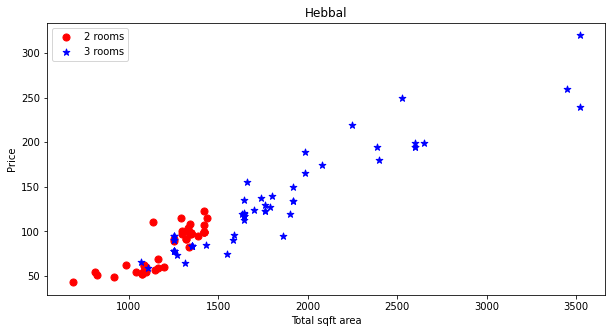

In [ ]:
def plot_scatter_chart(df, location):
  rooms2 = df[(df.location == location) & (df.rooms == 2)]
  rooms3 = df[(df.location == location) & (df.rooms == 3)]
  matplotlib.rcParams['figure.figsize'] = (10,5)
  plt.scatter(rooms2.total_sqft, rooms2.price, color='red', label = '2 rooms', s = 50)
  plt.scatter(rooms3.total_sqft, rooms3.price, marker='*', color='blue', label = '3 rooms', s = 50)
  plt.xlabel('Total sqft area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()


plot_scatter_chart(df7, "Hebbal")



In [ ]:
def remove_rooms_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    rooms_stats = {}
    for rooms, rooms_df in location_df.groupby('rooms'):
      rooms_stats[rooms] = {
          'mean' : np.mean(rooms_df.price_per_sqft),
          'std' : np.std(rooms_df.price_per_sqft),
          'count' : rooms_df.shape[0]

      }

      for rooms, rooms_df in location_df.groupby('rooms'):
        stats = rooms_stats.get(rooms -1)
        if stats and stats['count'] > 5:
          exclude_indices = np.append(exclude_indices, rooms_df[rooms_df.price_per_sqft< (stats['mean'])].index.values)
  return df.drop(exclude_indices, axis = 'index')

df8 = remove_rooms_outliers(df7)
df8.shape


(7342, 8)

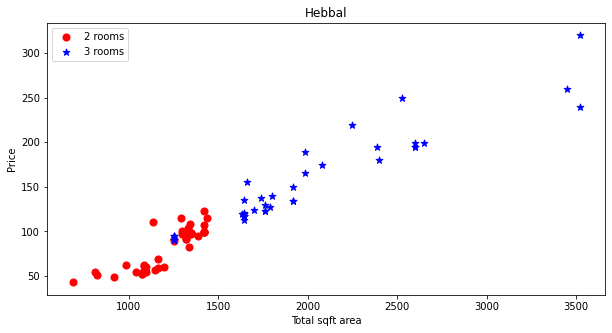

In [ ]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

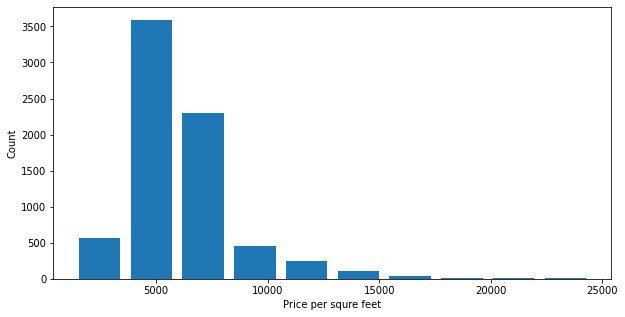

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] =(10,5)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per squre feet')
plt.ylabel('Count')

In [ ]:
df8.bath.unique()


array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,rooms,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,13,5069.124424


In [ ]:
df8[df8.bath>df8.rooms +2]

,location,size,total_sqft,bath,price,bhk,rooms,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,6,8819.897689


In [ ]:
df9 = df8[df8.bath<df8.rooms +2]
df9.shape

(7264, 8)

In [ ]:
df10 = df9.drop(['size','price_per_sqft','bhk'], axis='columns')
df10.head(10)

,location,total_sqft,bath,price,rooms
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
6,Devarachikkanahalli,1130.0,2.0,36.0,2
7,Devarachikkanahalli,1417.0,2.0,76.0,3
8,Devarachikkanahalli,1230.0,2.0,58.0,2
9,Devarachikkanahalli,1705.0,3.0,75.0,3
10,Devarachikkanahalli,1116.0,2.0,47.0,2


In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop('location' , axis='columns')
df12.head(3)

,total_sqft,bath,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.shape

(7264, 245)

In [ ]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 30)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8065727758057282

In [ ]:
def predict_price(location, sqft, bath, rooms):
  loc_index = np.where(X.columns == location )[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = rooms

  if loc_index >= 0:
    x[loc_index] = 1

  return lr_clf.predict([x])[0]
   

In [ ]:
X.columns

Index(['total_sqft', 'bath', 'rooms', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)


91.36515187034927

In [ ]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

95.96790668547396

In [ ]:
predict_price('Indira Nagar', 1000, 2, 2)

151.1233002119689

In [ ]:
predict_price('Indira Nagar', 1000, 3, 3)

155.72605502709365